Red points = Final Means


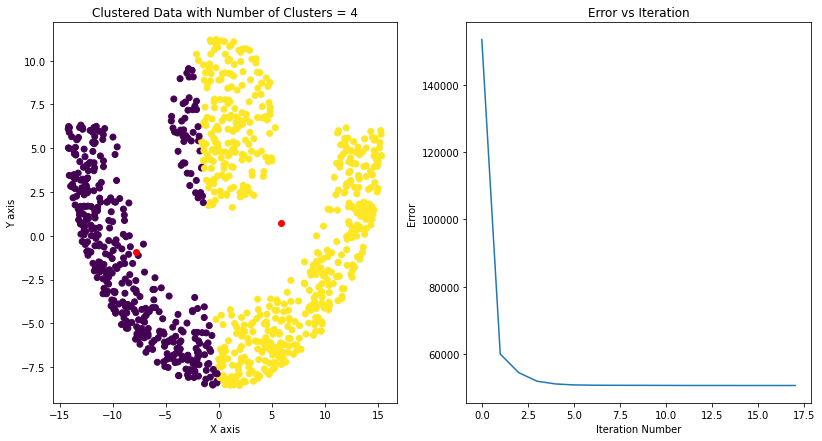

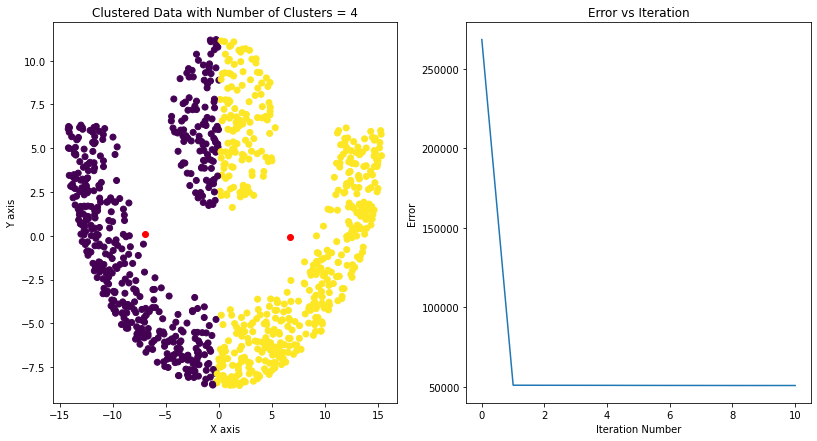

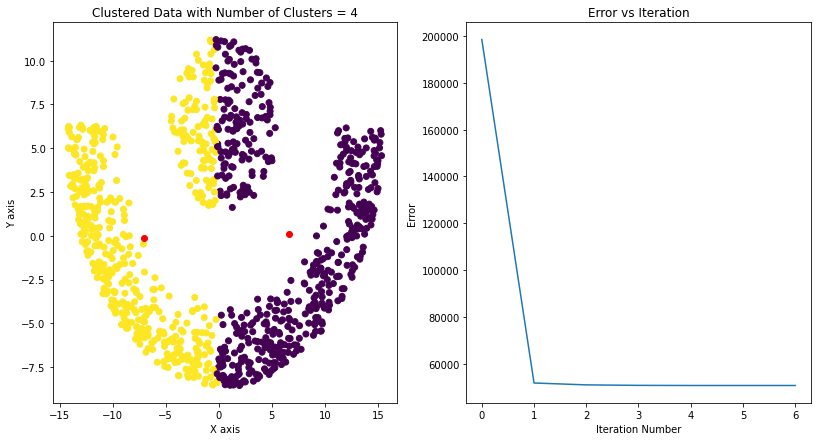

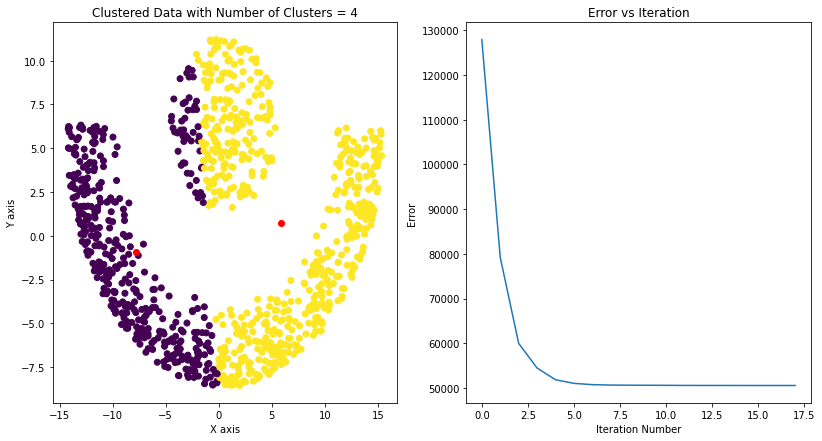

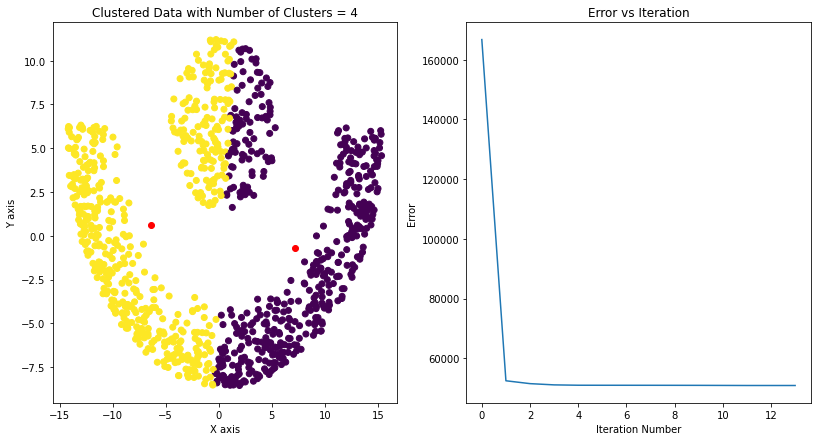

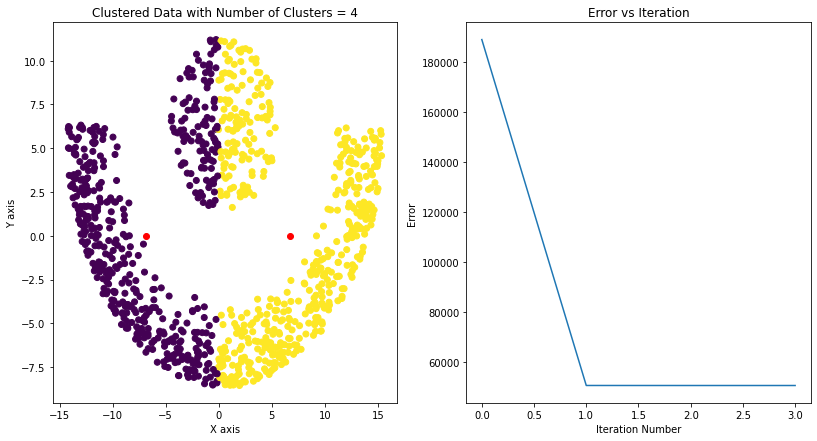

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


X = np.genfromtxt("cm_dataset_2.csv",delimiter=',')
X = X.T 



def llyodsAlgorithm(X,K,muRandom=None):
     
    Size = X.shape[1]
    errorTotal = []
    ZReassigned = np.zeros(Size,dtype=np.uint8)
          
    
    muRandom = X[:,np.random.randint(0,X.shape[1],K)]  
    muList = muRandom.copy()

    iter=0;
     
    while(True):

      
        error=0
        for i in range(Size):
            XCol=X[:,i]
            mucal=muList[:,ZReassigned[i]]
            errorCurrent = ((XCol-mucal)*(XCol-mucal)).sum()
            error += errorCurrent
      

        errorTotal.append(error)
         
        for i in range(Size):
             
            ZReassigned[i] = np.argmin(((X[:,i:i+1]-muList)**2).sum(axis=0))
 

        k=0
        for k in range(K):
             
            isZero=(ZReassigned==k).sum()
            if isZero!=0:
                sumRe=X*((ZReassigned==k).reshape(1,1000))
                muList[:,k] = sumRe.sum(axis=1)/isZero


        if iter>2:
            if abs(errorTotal[-1]-errorTotal[-2])<1:
                break

        iter+=1    
    return muRandom,muList,ZReassigned,errorTotal


def displayErrorVsIter(X,muRandom,muList,ZReassigned,history):
    plt.subplot(1,3,3)
    plt.plot(history)
    plt.xlabel("Iteration Number")
    plt.ylabel("Error")
    plt.title("Error vs Iteration")
    
def displayClustered(X,muRandom,muList,ZReassigned,history):
  
    plt.subplot(1,3,2)
    plt.xlabel("X axis")
    plt.ylabel("Y axis")
    plt.scatter(X[0],X[1],c=ZReassigned)
    plt.scatter(muList[0],muList[1],color='r')
    
    plt.title("Clustered Data with Number of Clusters = 4")
   

 

def displayResults(X,muRandom,muList,ZReassigned,history):

    plt.figure(figsize=(21,7))

    
    displayClustered(X,muRandom,muList,ZReassigned,history)
    displayErrorVsIter(X,muRandom,muList,ZReassigned,history)

    plt.show()


print("Red points = Final Means")
X_centered = X-X.mean(axis=1).reshape(-1,1) 

muRandom,muList,ZReassigned,history = llyodsAlgorithm(X_centered,K=2 )
displayResults(X_centered,muRandom,muList,ZReassigned,history)


muRandom,muList,ZReassigned,history = llyodsAlgorithm(X_centered,K=2 )
displayResults(X_centered,muRandom,muList,ZReassigned,history)

muRandom,muList,ZReassigned,history = llyodsAlgorithm(X_centered,K=2 )
displayResults(X_centered,muRandom,muList,ZReassigned,history)

muRandom,muList,ZReassigned,history = llyodsAlgorithm(X_centered,K=2 )
displayResults(X_centered,muRandom,muList,ZReassigned,history)

muRandom,muList,ZReassigned,history = llyodsAlgorithm(X_centered,K=2 )
displayResults(X_centered,muRandom,muList,ZReassigned,history)

muRandom,muList,ZReassigned,history = llyodsAlgorithm(X_centered,K=2 )
displayResults(X_centered,muRandom,muList,ZReassigned,history)